# Initialize packages

In [7]:
import numpy as np
import xarray as xr
import dfm_tools as dfmt

In [8]:
from collections import ChainMap

In [9]:
import glob
import warnings

In [10]:
import dask
import os
import pandas as pd

In [11]:
from dask_jobqueue import SLURMCluster
from dask.distributed import Client

# Initialize Dask cluster

In [12]:
n_cores = 16
n_processes = 4
mem_lim = str(336)+'GB' #taking the entire node #str(int(np.floor(336/(n_cores*n_processes))))+'GB' # 768 GB of memory for one entire memory node on DelftBlue

In [13]:
mem_lim

'336GB'

In [14]:
cluster = SLURMCluster(name='dask-cluster',
                       cores=n_cores,
                       memory=mem_lim,
                       processes=n_processes,
                       interface='ib0',
                       queue='genoa',
                       walltime='04:00:00',
                       asynchronous=0)

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41763 instead
  warnings.warn(


In [15]:
print(cluster.job_script())

#!/usr/bin/env bash

#SBATCH -J dask-worker
#SBATCH -p genoa
#SBATCH -n 1
#SBATCH --cpus-per-task=16
#SBATCH --mem=313G
#SBATCH -t 04:00:00

/home/mgeraeds/.conda/envs/dfm_proc_env/bin/python -m distributed.cli.dask_worker tcp://172.22.63.192:35195 --name dummy-name --nthreads 4 --memory-limit 78.23GiB --nworkers 4 --nanny --death-timeout 60 --interface ib0



In [16]:
cluster.scale(1)

In [17]:
client = Client(cluster)

In [18]:
client

Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: http://172.22.63.192:41763/status,
Dashboard: http://172.22.63.192:41763/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://172.22.63.192:35195,Workers: 0
Dashboard: http://172.22.63.192:41763/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [19]:
client.dashboard_link

'http://172.22.63.192:41763/status'

# Load large (complete) dataset

In [14]:
input_regex = r'/projects/0/einf1300/saltis-wp3-1/C_Work/00_RMM3d_2022_simulations/computations/B02_2022_jul21-aug7/B02_2022_jul21-aug7_sm/RMM_dflowfm_2022_jul21_aug7_sm_000*_map.nc'

In [23]:
input_regex = r'/projects/0/einf1300/saltis-wp3-1/C_Work/05_RMD_2019/computations/D02/D02AU/RMD_dflowfm_D02AU_0000_map.nc'

In [24]:
data_xr = dfmt.open_partitioned_dataset(input_regex, chunks={'time':100})

>> xu.open_dataset() with 1 partition(s): 1 : 8.01 sec


In [25]:
data_xr

<xarray.Dataset>
Dimensions:                      (mesh2d_nNodes: 1394, mesh2d_nEdges: 2708,
                                  mesh2d_nFaces: 1315,
                                  mesh2d_nMax_face_nodes: 4, time: 2377,
                                  mesh2d_nLayers: 36, mesh2d_nInterfaces: 37,
                                  Two: 2)
Coordinates:
    mesh2d_node_x                (mesh2d_nNodes) float64 dask.array<chunksize=(1394,), meta=np.ndarray>
    mesh2d_node_y                (mesh2d_nNodes) float64 dask.array<chunksize=(1394,), meta=np.ndarray>
    mesh2d_edge_x                (mesh2d_nEdges) float64 dask.array<chunksize=(2708,), meta=np.ndarray>
    mesh2d_edge_y                (mesh2d_nEdges) float64 dask.array<chunksize=(2708,), meta=np.ndarray>
    mesh2d_face_x                (mesh2d_nFaces) float64 dask.array<chunksize=(1315,), meta=np.ndarray>
    mesh2d_face_y                (mesh2d_nFaces) float64 dask.array<chunksize=(1315,), meta=np.ndarray>
  * time                         (time) datetime64[ns] 2019-07-30T12:00:00 .....
    mesh2d_flowelem_zcc          (time, mesh2d_nFaces, mesh2d_nLayers) float32 dask.array<chunksize=(100, 1315, 36), meta=np.ndarray>
    mesh2d_flowelem_zw           (time, mesh2d_nFaces, mesh2d_nInterfaces) float32 dask.array<chunksize=(100, 1315, 37), meta=np.ndarray>
  * mesh2d_nNodes                (mesh2d_nNodes) int64 0 1 2 ... 1391 1392 1393
  * mesh2d_nEdges                (mesh2d_nEdges) int64 0 1 2 ... 2705 2706 2707
  * mesh2d_nFaces                (mesh2d_nFaces) int64 0 1 2 ... 1312 1313 1314
Dimensions without coordinates: mesh2d_nMax_face_nodes, mesh2d_nLayers,
                                mesh2d_nInterfaces, Two
Data variables: (12/44)
    projected_coordinate_system  int32 ...
    mesh2d_node_z                (mesh2d_nNodes) float64 dask.array<chunksize=(1394,), meta=np.ndarray>
    mesh2d_face_x_bnd            (mesh2d_nFaces, mesh2d_nMax_face_nodes) float64 dask.array<chunksize=(1315, 4), meta=np.ndarray>
    mesh2d_face_y_bnd            (mesh2d_nFaces, mesh2d_nMax_face_nodes) float64 dask.array<chunksize=(1315, 4), meta=np.ndarray>
    mesh2d_edge_type             (mesh2d_nEdges) float64 dask.array<chunksize=(2708,), meta=np.ndarray>
    mesh2d_bldepth               (mesh2d_nFaces) float64 dask.array<chunksize=(1315,), meta=np.ndarray>
    ...                           ...
    mesh2d_windstressx           (time, mesh2d_nFaces) float32 dask.array<chunksize=(100, 1315), meta=np.ndarray>
    mesh2d_windstressy           (time, mesh2d_nFaces) float32 dask.array<chunksize=(100, 1315), meta=np.ndarray>
    mesh2d_turkin1               (time, mesh2d_nEdges, mesh2d_nInterfaces) float32 dask.array<chunksize=(100, 2708, 37), meta=np.ndarray>
    mesh2d_vicwwu                (time, mesh2d_nEdges, mesh2d_nInterfaces) float32 dask.array<chunksize=(100, 2708, 37), meta=np.ndarray>
    mesh2d_tureps1               (time, mesh2d_nEdges, mesh2d_nInterfaces) float32 dask.array<chunksize=(100, 2708, 37), meta=np.ndarray>
    mesh2d_cftrt                 (time, mesh2d_nEdges) float32 dask.array<chunksize=(100, 2708), meta=np.ndarray>
Attributes:
    institution:               Deltares
    references:                https://www.deltares.nl
    source:                    D-Flow FM 1.2.184.4a31aea51d1d200d4eb2f3262c80...
    history:                   Created on 2024-05-10T22:15:05+0200, D-Flow FM
    date_created:              2024-05-10T22:15:05+0200
    date_modified:             2024-05-10T22:15:05+0200
    Conventions:               CF-1.8 UGRID-1.0 Deltares-0.10 ACDD-1.3
    uuid:                      2532640c-6c12-4926-81a8-295cd65e5ff9
    time_coverage_start:       2019-07-30T12:00:00+00:00
    time_coverage_end:         2019-09-01T12:00:00+00:00
    time_coverage_duration:    P33DT0H0M0S
    time_coverage_resolution:  P0000-00-00T00:20:00

Check if any of the input files are corrupted.

In [20]:
## 1. Input tests
# 1.x. Loop through all of the files and write when there is something wrong with the file
file_list = glob.glob(input_regex)

# 1.x Make a list for corrupted files
corrupted = []

for file in file_list:

    file_name = file.split('/')[-1]
    
    try:
        test = xr.open_dataset(file)
    except:
        warnings.warn(f'The file {file_name} seems to be corrupted. Check your inputs.', UserWarning)
        corrupted.append(file)

/scratch-local/mgeraeds/ipykernel_3024447/1074292120.py:15: UserWarning: The file RMD_dflowfm_D02AU_0056_map.nc seems to be corrupted. Check your inputs.
  warnings.warn(f'The file {file_name} seems to be corrupted. Check your inputs.', UserWarning)


If any of the files are corrupted, take them out of the file list to be loaded.

In [21]:
# I.x Check if there are any corrupted files in the listed files
if len(corrupted) > 0:
    print('There are corrupted files. These will be taken out of the file list for the next tests.')
    
# I.x Get the entire input list and remove the corrupted files
input_files = [f for f in glob.glob(input_regex) if not f in corrupted]

There are corrupted files. These will be taken out of the file list for the next tests.


In [22]:
input_files

['/projects/0/einf1300/saltis-wp3-1/C_Work/05_RMD_2019/computations/D02/D02AU/RMD_dflowfm_D02AU_0049_map.nc',
 '/projects/0/einf1300/saltis-wp3-1/C_Work/05_RMD_2019/computations/D02/D02AU/RMD_dflowfm_D02AU_0017_map.nc',
 '/projects/0/einf1300/saltis-wp3-1/C_Work/05_RMD_2019/computations/D02/D02AU/RMD_dflowfm_D02AU_0078_map.nc',
 '/projects/0/einf1300/saltis-wp3-1/C_Work/05_RMD_2019/computations/D02/D02AU/RMD_dflowfm_D02AU_0073_map.nc',
 '/projects/0/einf1300/saltis-wp3-1/C_Work/05_RMD_2019/computations/D02/D02AU/RMD_dflowfm_D02AU_0068_map.nc',
 '/projects/0/einf1300/saltis-wp3-1/C_Work/05_RMD_2019/computations/D02/D02AU/RMD_dflowfm_D02AU_0080_map.nc',
 '/projects/0/einf1300/saltis-wp3-1/C_Work/05_RMD_2019/computations/D02/D02AU/RMD_dflowfm_D02AU_0079_map.nc',
 '/projects/0/einf1300/saltis-wp3-1/C_Work/05_RMD_2019/computations/D02/D02AU/RMD_dflowfm_D02AU_0064_map.nc',
 '/projects/0/einf1300/saltis-wp3-1/C_Work/05_RMD_2019/computations/D02/D02AU/RMD_dflowfm_D02AU_0007_map.nc',
 '/project

Append another random partition for testing purposes.

In [17]:
input_files.append('/projects/0/einf1300/saltis-wp3-1/C_Work/00_RMM3d_2022_simulations/computations/B02_2022_jul21-aug7/B02_2022_jul21-aug7_sm/RMM_dflowfm_2022_jul21_aug7_sm_0122_map.nc')

Load the data.

In [23]:
data_xr = dfmt.open_partitioned_dataset(input_files, chunks={'time':100})

>> xu.open_dataset() with 95 partition(s): 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 : 745.39 sec
>> xu.merge_partitions() with 95 partition(s): 3.16 sec
>> some variables dropped with merging of partitions: ['mesh2d_face_x_bnd', 'mesh2d_face_y_bnd']
>> dfmt.open_partitioned_dataset() total: 748.57 sec


Determine the variables to keep for the next computation and define `ds`.

In [19]:
keep_vars = ['mesh2d_sa1', 'mesh2d_node_z', 'mesh2d_ucx', 'mesh2d_ucy', 'mesh2d_ucz', 'mesh2d_vol1', 'mesh2d_vicwwu','mesh2d_tem1', 'mesh2d_face_nodes', 'mesh2d_edge_nodes', 'mesh2d']

Visualize the loaded data to see if it's consistent.

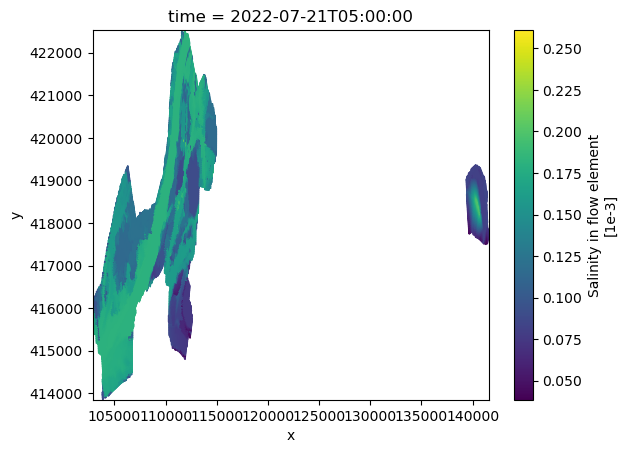

In [19]:
data_xr.isel(time=5, mesh2d_nLayers=45)['mesh2d_sa1'].ugrid.plot()

# Testing write total

In [20]:
out_file = r'testing_readwrite_map.nc'

In [41]:
# ds.ugrid.to_netcdf(out_file, compute=True)
with ProgressBar():
    ds.ugrid.to_netcdf(out_file, compute=True)

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 15.69 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [45]:
out_file = 'testing_readwrite2_map.nc'

In [46]:
xrds = ds.ugrid.to_dataset()
write_task = xrds.to_netcdf(out_file, compute=False)
with ProgressBar():
    write_task.compute()

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 14.87 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [53]:
testing_load = dfmt.open_partitioned_dataset('testing_readwrite_total_map.nc')

>> xu.open_dataset() with 1 partition(s): 1 [7 nan fillvalue attrs removed][nodomainvar] : 1.15 sec


# Testing write per variable

Determine the name of the output file.

In [27]:
out_file = r'variable_test.nc'

In [22]:
import xugrid as xu

In [35]:
encoding = {"mesh2d_face_nodes": {"dtype": "float32"}, "mesh2d_edge_nodes": {"dtype": "float64"}, "mesh2d_nNodes": {"dtype":"int32"}, "mesh2d_nFaces": {"dtype":"int32"}, "mesh2d_nEdges": {"dtype":"int32"}, "mesh2d_flowelem_zcc": {"dtype":"float32"}, "mesh2d_flowelem_zw": {"dtype":"float32"}, "mesh2d_face_x": {"dtype":"float32"}, "mesh2d_face_y": {"dtype":"float32"}, "mesh2d_edge_x": {"dtype":"float32"}, "mesh2d_edge_y": {"dtype":"float32"}, "mesh2d_sa1": {"dtype":"float32"}, "mesh2d_node_x": {"dtype":"float32"}, "mesh2d_node_y": {"dtype":"float32"}, "mesh2d_node_z": {"dtype":"float32"}, "mesh2d_ucx": {"dtype":"float32"}, "mesh2d_ucy": {"dtype":"float32"}, "mesh2d_ucz": {"dtype":"float32"}, "mesh2d_vol1": {"dtype":"float32"}, "mesh2d_vicwwu": {"dtype":"float32"}, "mesh2d_tem1":{"dtype":"float32"}}

`xugrid` implementation

In [25]:
ds = data_xr

In [28]:
# Define counter for possible subdivision of times in writing
i = 0
tds = ds.isel(time=slice(0,10))

for v in keep_vars:

    # > Select the time
    print(f'Starting selection of variable {v}...')
    vds = tds[v]#.astype('float32', casting='same_kind') # first test with reducing the data

    print(f'Loaded the dataset at variable {v}.')

    # > If there's encoding specified, make a subset for the variables in that dataset only
    var_list = list(vds.coords) + [vds.name]
    encoding_sub = dict(ChainMap(*[{f"{v}": encoding[v]} for v in var_list if v in encoding]))

    if i == 0:
        # > For t = 0 in the range of timesteps, check if there's a file
        # > already present. If it is, remove it.
        if os.path.isfile(out_file):
            os.remove(out_file)

        # Use dask.delayed to write file to disk
        print('Writing file to disk...')
        print(f"Outputfile: {out_file}")
        vds.ugrid.to_netcdf(out_file, mode='w', compute=True, encoding=encoding_sub)

    else:
        # Use dask.delayed to write file to disk
        print('Writing file to disk in append mode...')
        print(f"Outputfile: {out_file}")
        vds.ugrid.to_netcdf(out_file, mode='a', compute=True, encoding=encoding_sub)

    # writing_task.compute()
    vds.close()

    # > Update counter
    i += 1

Starting selection of variable mesh2d_sa1...
Loaded the dataset at variable mesh2d_sa1.
Writing file to disk...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_node_z...
Loaded the dataset at variable mesh2d_node_z.
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_ucx...
Loaded the dataset at variable mesh2d_ucx.
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_ucy...
Loaded the dataset at variable mesh2d_ucy.
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_ucz...
Loaded the dataset at variable mesh2d_ucz.
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_vol1...
Loaded the dataset at variable mesh2d_vol1.
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_vicwwu...
Loaded the dataset at v

`xarray` implementation

In [134]:
import xugrid as xu

In [30]:
ds = data_xr

In [36]:
# Define counter for possible subdivision of times in writing
i = 0

# > If it's an unstructured xu.UgridDataset, make the dataset into an xr.Dataset
if isinstance(ds, xu.core.wrap.UgridDataset):
    # > We need to store the hidden information as well, so get those variables
    hidden_vars = list(ds.ugrid.grid.to_dataset().variables)
    # > Add them to the keep_vars list
    keep_vars = keep_vars + hidden_vars
    # > Make the original dataset into an xr.Dataset
    ds = ds.ugrid.to_dataset()
    # > Only get the reduced dataset with keep_vars
    ds = ds[keep_vars]
    
else:
    ds = ds[keep_vars]

# > Select the required time period
tds = ds.isel(time=slice(0,10))

for v in keep_vars:

    # > Select the time
    print(f'Starting selection of variable {v}...')
    vds = tds[v] #.astype('float32', casting='same_kind') # first test with reducing the data

    # print(f'Loaded the dataset at variable {v}.')

    # > If there's encoding specified, make a subset for the variables in that dataset only
    var_list = list(vds.coords) + [vds.name]
    
    # try:
    encoding_sub = dict(ChainMap(*[{f"{v}": encoding[v]} for v in var_list if v in encoding]))
    # except:
    #     encoding_sub = {}

    if i == 0:
        # > For t = 0 in the range of timesteps, check if there's a file
        # > already present. If it is, remove it.
        if os.path.isfile(out_file):
            os.remove(out_file)

        # Use dask.delayed to write file to disk
        print('Writing file to disk...')
        # print(f"Outputfile: {out_file}")
        vds.to_netcdf(out_file, mode='w', compute=True, encoding=encoding_sub)

    else:
        # Use dask.delayed to write file to disk
        print('Writing file to disk in append mode...')
        # print(f"Outputfile: {out_file}")
        vds.to_netcdf(out_file, mode='a', compute=True, encoding=encoding_sub)

    # writing_task.compute()
    vds.close()

    print(f"Outputfile: {out_file}")
    # > Update counter
    i += 1

Starting selection of variable mesh2d_sa1...
Writing file to disk...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_node_z...
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_ucx...
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_ucy...
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_ucz...
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_vol1...
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_vicwwu...
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_tem1...
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_face_nodes...
Writing file to disk in append mode...
Outputfile: 

# Check reference without data reduction

In [37]:
out_file_ref = r'variable_test_ref.nc'

In [208]:
# Define counter for possible subdivision of times in writing
i = 0

# > If it's an unstructured xu.UgridDataset, make the dataset into an xr.Dataset
if isinstance(ds, xu.core.wrap.UgridDataset):
    # > We need to store the hidden information as well, so get those variables
    hidden_vars = list(ds.ugrid.grid.to_dataset().variables)
    # > Add them to the keep_vars list
    keep_vars = keep_vars + hidden_vars
    # > Make the original dataset into an xr.Dataset
    ds = ds.ugrid.to_dataset()
    # > Only get the reduced dataset with keep_vars
    ds = ds[keep_vars]
    
else:
    ds = ds[keep_vars]

# > Select the required time period
tds = ds.isel(time=slice(0,10))

for v in keep_vars:

    # > Select the time
    print(f'Starting selection of variable {v}...')
    vds = tds[v] #.astype('float32', casting='same_kind') # first test with reducing the data

    print(f'Loaded the dataset at variable {v}.')

    if i == 0:
        # > For t = 0 in the range of timesteps, check if there's a file
        # > already present. If it is, remove it.
        if os.path.isfile(out_file_ref):
            os.remove(out_file_ref)

        # Use dask.delayed to write file to disk
        print('Writing file to disk...')
        # print(f"Outputfile: {out_file}")
        vds.to_netcdf(out_file_ref, mode='w', compute=True)

    else:
        # Use dask.delayed to write file to disk
        print('Writing file to disk in append mode...')
        # print(f"Outputfile: {out_file}")
        vds.to_netcdf(out_file_ref, mode='a', compute=True)

    # writing_task.compute()
    vds.close()

    print(f"Outputfile: {out_file_ref}")
    # > Update counter
    i += 1

Starting selection of variable mesh2d_sa1...
Loaded the dataset at variable mesh2d_sa1.
Writing file to disk...
Outputfile: variable_test_ref.nc
Starting selection of variable mesh2d_node_z...
Loaded the dataset at variable mesh2d_node_z.
Writing file to disk in append mode...
Outputfile: variable_test_ref.nc
Starting selection of variable mesh2d_ucx...
Loaded the dataset at variable mesh2d_ucx.
Writing file to disk in append mode...
Outputfile: variable_test_ref.nc
Starting selection of variable mesh2d_ucy...
Loaded the dataset at variable mesh2d_ucy.
Writing file to disk in append mode...
Outputfile: variable_test_ref.nc
Starting selection of variable mesh2d_ucz...
Loaded the dataset at variable mesh2d_ucz.
Writing file to disk in append mode...
Outputfile: variable_test_ref.nc
Starting selection of variable mesh2d_vol1...
Loaded the dataset at variable mesh2d_vol1.
Writing file to disk in append mode...
Outputfile: variable_test_ref.nc
Starting selection of variable mesh2d_vicwwu...

Re-load the dataset to check written contents (first into xarray and then into an xugrid.UgridDataset).

In [20]:
import xugrid as xu

In [21]:
# testing_load_xr = xr.open_dataset('variable_test.nc')
# testing_load_xu = xu.open_dataset('variable_test.nc')
test_load_xu = xu.open_dataset('D02AU_red2.nc')

In [22]:
test_load_xu

<xarray.Dataset>
Dimensions:                        (time: 2377, mesh2d_nFaces: 13167,
                                    mesh2d_nLayers: 36, mesh2d_nNodes: 13795,
                                    mesh2d_nEdges: 26961, mesh2d_nInterfaces: 37)
Coordinates:
  * time                           (time) datetime64[ns] 2019-07-30T12:00:00 ...
    mesh2d_face_x                  (mesh2d_nFaces) float32 ...
    mesh2d_face_y                  (mesh2d_nFaces) float32 ...
    mesh2d_flowelem_zcc            (time, mesh2d_nFaces, mesh2d_nLayers) float32 ...
    mesh2d_node_x                  (mesh2d_nNodes) float32 ...
    mesh2d_node_y                  (mesh2d_nNodes) float32 ...
    mesh2d_edge_x                  (mesh2d_nEdges) float32 ...
    mesh2d_edge_y                  (mesh2d_nEdges) float32 ...
  * mesh2d_nNodes                  (mesh2d_nNodes) int64 0 1 2 ... 13793 13794
  * mesh2d_nEdges                  (mesh2d_nEdges) int64 0 1 2 ... 26959 26960
  * mesh2d_nFaces                  (mesh2d_nFaces) int64 0 1 2 ... 13165 13166
Dimensions without coordinates: mesh2d_nLayers, mesh2d_nInterfaces
Data variables:
    mesh2d_sa1                     (time, mesh2d_nFaces, mesh2d_nLayers) float32 ...
    mesh2d_node_z                  (mesh2d_nNodes) float32 ...
    mesh2d_ucx                     (time, mesh2d_nFaces, mesh2d_nLayers) float32 ...
    mesh2d_ucy                     (time, mesh2d_nFaces, mesh2d_nLayers) float32 ...
    mesh2d_ucz                     (time, mesh2d_nFaces, mesh2d_nLayers) float32 ...
    mesh2d_vol1                    (time, mesh2d_nFaces, mesh2d_nLayers) float32 ...
    mesh2d_vicwwu                  (time, mesh2d_nEdges, mesh2d_nInterfaces) float32 ...
    mesh2d_tem1                    (time, mesh2d_nFaces, mesh2d_nLayers) float32 ...
    __xarray_dataarray_variable__  (mesh2d_nNodes) float64 ...
Attributes:
    __xarray_dataarray_name__:  mesh2d_node_y

Visualize the data.

In [29]:
test_load_xu.isel(time=5, mesh2d_nLayers=35)['mesh2d_sa1'].ugrid.plot()

AttributeError: 'DataArray' object has no attribute 'ugrid'